In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from scipy.linalg import svd

In [ ]:
# Load and preprocess the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images to 1D vectors (28x28 = 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Build the model
original_model = models.Sequential([
    layers.Dense(100, activation='relu', input_shape=(784,)),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
original_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
original_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 84,060 (328.36 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = original_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9730 - val_loss: 0.1147
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9948 - loss: 0.0145 - val_accuracy: 0.9786 - val_loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9955 - loss: 0.0139 - val_accuracy: 0.9795 - val_loss: 0.0957
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.9773 - val_loss: 0.1104
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9961 - loss: 0.0107 - val_accuracy: 0.9739 - val_loss: 0.1242
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9952 - loss: 0.0152 - val_accuracy: 0.9763 - val_loss: 0.1150
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9966 - loss: 0.0094 - val_accuracy: 0.9755 - val_loss: 0.1247
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9967 - loss: 0.0112 - 

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = original_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9782 - loss: 0.1341


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


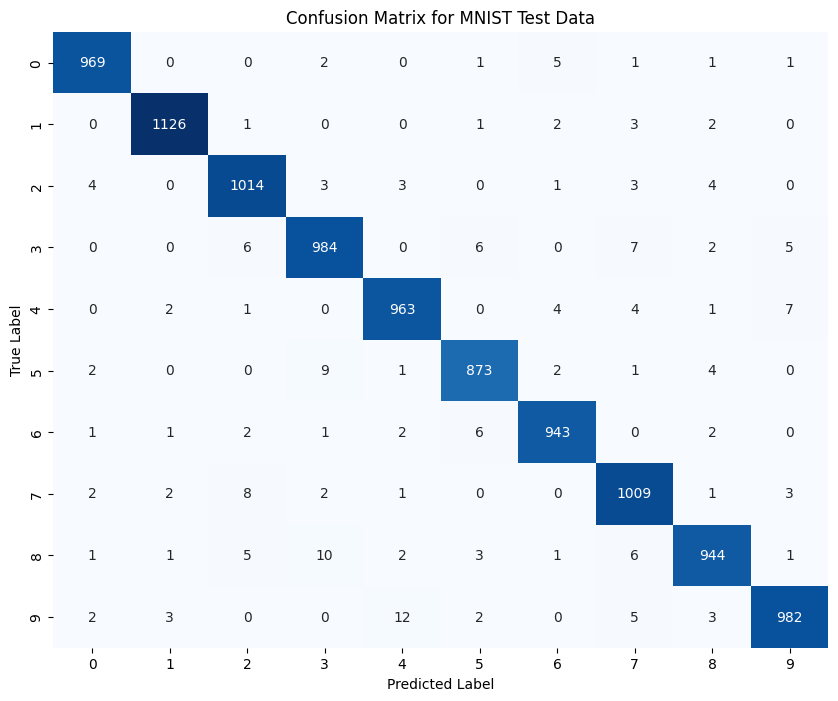

Test Loss: 0.11450128257274628
Test Accuracy: 0.9807000160217285


In [ ]:
# Generate predictions for the test set
y_pred = original_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix (thx chatgpt <3)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for MNIST Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the final test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
# Define the low-rank approximation function using singular value decomposition (its been a while since linear algebra ;_;)
def low_rank_approximation(W, rank):
    U, S, Vt = svd(W, full_matrices=False)
    U_prime = U[:, :rank] @ np.diag(S[:rank])
    Vt_prime = Vt[:rank, :]
    return U_prime, Vt_prime

# Extract the original weights and biases from the trained model
weights = original_model.get_weights()

# Apply SVD and create the new weight matrices for the compressed model
rank = 5  # Adjust this as needed based on the desired compression level
U1, Vt1 = low_rank_approximation(weights[0], rank)
U2, Vt2 = low_rank_approximation(weights[2], rank)
U3, Vt3 = low_rank_approximation(weights[4], rank)

# Display the shape of each original weight matrix and bias vector (original biases aren't used in the new model, it just develops new biases during refinement training)
for i in range(len(weights)):
    if i % 2 == 0:
        print(f"Original weight matrix {i//2 + 1} shape: {weights[i].shape}")
    else:
        print(f"Original bias vector {i//2 + 1} shape: {weights[i].shape}")

# Display the shape of each matrix after SVD
print(f"\nShape of U1: {U1.shape}")
print(f"Shape of Vt1.T: {Vt1.T.shape}")
print(f"Shape of U2: {U2.shape}")
print(f"Shape of Vt2.T: {Vt2.T.shape}")
print(f"Shape of U3: {U3.shape}")
print(f"Shape of Vt3.T: {Vt3.T.shape}")




Original weight matrix 1 shape: (784, 100)
Original bias vector 1 shape: (100,)
Original weight matrix 2 shape: (100, 50)
Original bias vector 2 shape: (50,)
Original weight matrix 3 shape: (50, 10)
Original bias vector 3 shape: (10,)

Shape of U1: (784, 5)
Shape of Vt1.T: (100, 5)
Shape of U2: (100, 5)
Shape of Vt2.T: (50, 5)
Shape of U3: (50, 5)
Shape of Vt3.T: (10, 5)


In [ ]:

# Create the compressed model with two layers for each dense layer
compressed_model = models.Sequential([
    layers.Dense(rank, activation='relu', input_shape=(784,), use_bias=False),  # U1
    layers.Dense(100, activation='relu', use_bias=True),                        # Vt1.T
    layers.Dense(rank, activation='relu', use_bias=False),                      # U2
    layers.Dense(50, activation='relu', use_bias=True),                         # Vt2.T
    layers.Dense(rank, activation='relu', use_bias=False),                      # U3
    layers.Dense(10, activation='softmax', use_bias=True)                       # Vt3.T
])

# Print the shapes of the transposed matrices

print(f"Shape of U1: {U1.shape}")
print(f"Shape of Vt1.T: {Vt1.shape}")
print(f"Shape of U2: {U2.shape}")
print(f"Shape of Vt2.T: {Vt2.shape}")
print(f"Shape of U3: {U3.shape}")
print(f"Shape of Vt3.T: {Vt3.shape}")

# Manually set the compressed weights and unaltered biases from original model
compressed_model.layers[0].set_weights([U1])
compressed_model.layers[1].set_weights([Vt1, weights[1]])
compressed_model.layers[2].set_weights([U2])
compressed_model.layers[3].set_weights([Vt2, weights[3]])
compressed_model.layers[4].set_weights([U3])
compressed_model.layers[5].set_weights([Vt3, weights[5]])

# Compile the compressed model
compressed_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

# Print the model summary
compressed_model.summary()

Shape of U1: (784, 5)
Shape of Vt1.T: (5, 100)
Shape of U2: (100, 5)
Shape of Vt2.T: (5, 50)
Shape of U3: (50, 5)
Shape of Vt3.T: (5, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                     │ (None, 5)                   │           3,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 100)                 │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 5)                   │             500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 50)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ (None, 5)                   │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ (None, 10)                  │              60 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,630 (21.99 KB)

 Trainable params: 5,630 (21.99 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the compressed model
compressed_history = compressed_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5335 - loss: 1.3855 - val_accuracy: 0.7748 - val_loss: 0.6851
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8043 - loss: 0.6088 - val_accuracy: 0.8334 - val_loss: 0.5382
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8466 - loss: 0.5050 - val_accuracy: 0.8617 - val_loss: 0.4657
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8659 - loss: 0.4480 - val_accuracy: 0.8705 - val_loss: 0.4455
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8734 - loss: 0.4216 - val_accuracy: 0.8648 - val_loss: 0.4619
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8811 - loss: 0.3989 - val_accuracy: 0.8765 - val_loss: 0.4186
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8875 - loss: 0.3839 - val_accuracy: 0.8830 - val_loss: 0.4084
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8904 - loss: 0.3750 - 

In [ ]:
# Evaluate the compressed model on test data
test_loss, test_accuracy = compressed_model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7119 - loss: 0.9144


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


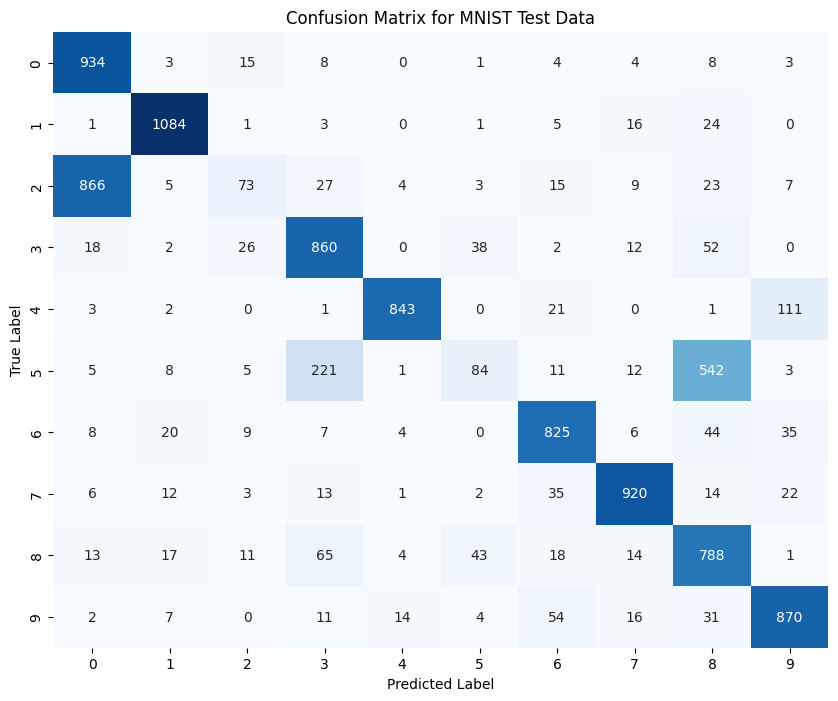

Test Loss: 0.8643600344657898
Test Accuracy: 0.7281000018119812


In [ ]:
# Generate compressed model predictions for the test set
y_pred = compressed_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for MNIST Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the final test loss and accuracy
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Creating compressed model with 2X compression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                     │ (None, 50)                  │          39,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_79 (Dense)                     │ (None, 100)                 │           5,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 25)                  │           2,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 50)                  │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 5)                   │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,520 (189.53 KB)

 Trainable params: 48,520 (189.53 KB)

 Non-trainable params: 0 (0.00 B)


Layer Information:
Layer 0: U_k shape (784, 50)
Layer 1: Vt_k shape (50, 100)
Layer 2: U_k shape (100, 25)
Layer 3: Vt_k shape (25, 50)
Layer 4: U_k shape (50, 5)
Layer 5: Vt_k shape (5, 10)

--------------------------------------------
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4618 - loss: 1.4670 - val_accuracy: 0.9149 - val_loss: 0.3707
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9300 - loss: 0.2796 - val_accuracy: 0.9370 - val_loss: 0.2406
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9513 - loss: 0.1877 - val_accuracy: 0.9500 - val_loss: 0.2001
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9617 - loss: 0.1455 - val_accuracy: 0.9583 - val_loss: 0.1714
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9674 - loss: 0.1220 - val_accuracy: 0.9569 - val_loss: 0.1733
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9713 - loss: 0.1063 - val_accuracy: 0.9613 -

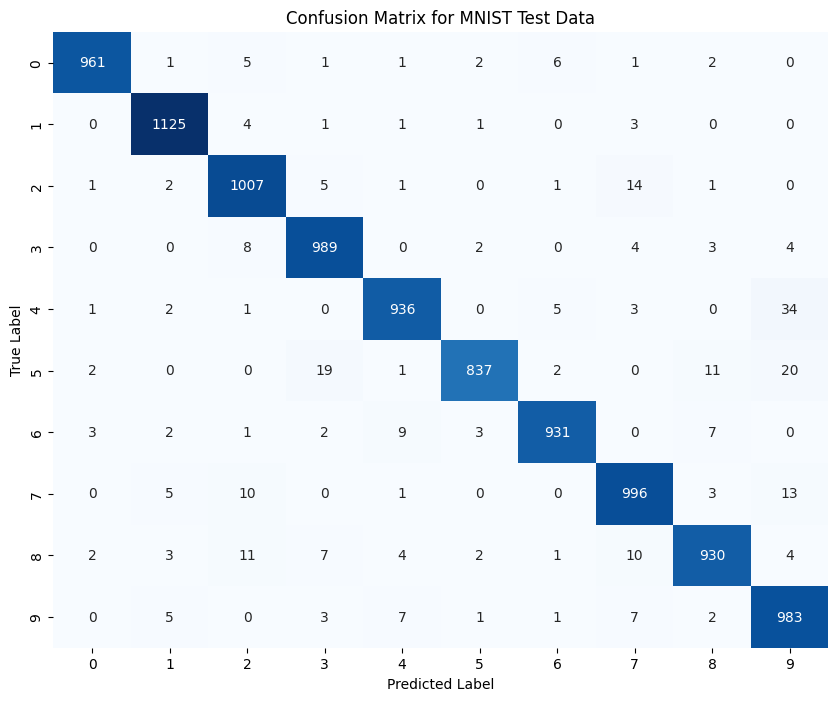

Test Loss: 0.1265634447336197
Test Accuracy: 0.9695000052452087

Creating compressed model with 4X compression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_85 (Dense)                     │ (None, 25)                  │          19,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_86 (Dense)                     │ (None, 100)                 │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 12)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 50)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 2)                   │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_90 (Dense)                     │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_91 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,290 (94.88 KB)

 Trainable params: 24,290 (94.88 KB)

 Non-trainable params: 0 (0.00 B)


Layer Information:
Layer 0: U_k shape (784, 25)
Layer 1: Vt_k shape (25, 100)
Layer 2: U_k shape (100, 12)
Layer 3: Vt_k shape (12, 50)
Layer 4: U_k shape (50, 2)
Layer 5: Vt_k shape (2, 10)

--------------------------------------------
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.3167 - loss: 1.7762 - val_accuracy: 0.4995 - val_loss: 1.0593
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6334 - loss: 0.8464 - val_accuracy: 0.7687 - val_loss: 0.6248
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7997 - loss: 0.5502 - val_accuracy: 0.9148 - val_loss: 0.3870
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9207 - loss: 0.3158 - val_accuracy: 0.9284 - val_loss: 0.3108
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9327 - loss: 0.2578 - val_accuracy: 0.9315 - val_loss: 0.2962
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9385 - loss: 0.2327 - val_accuracy: 0.9395 -

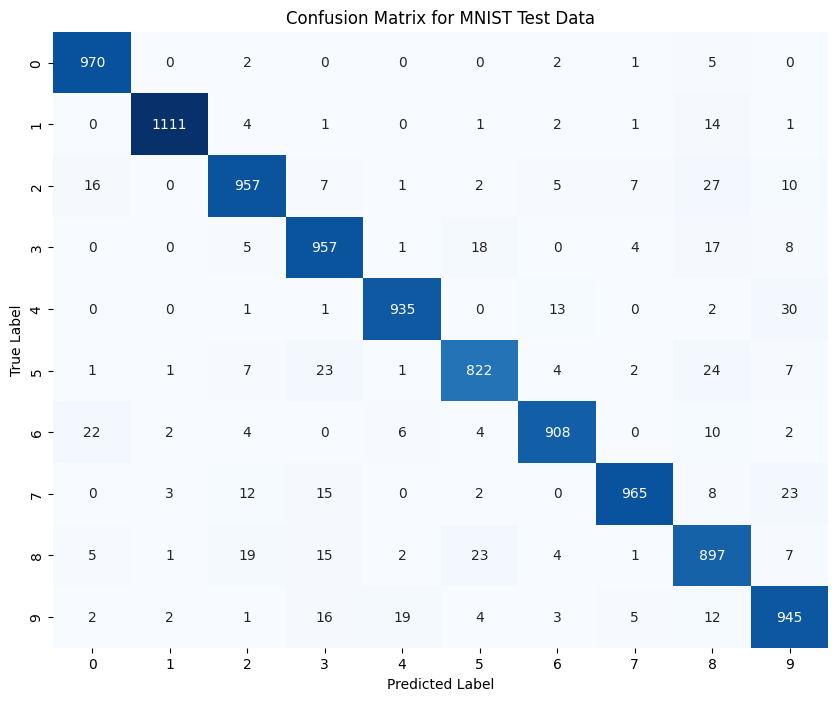

Test Loss: 0.2471439689397812
Test Accuracy: 0.9466999769210815

Creating compressed model with 8X compression


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_92 (Dense)                     │ (None, 12)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_93 (Dense)                     │ (None, 100)                 │           1,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 6)                   │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 50)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 1)                   │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,838 (46.24 KB)

 Trainable params: 11,838 (46.24 KB)

 Non-trainable params: 0 (0.00 B)


Layer Information:
Layer 0: U_k shape (784, 12)
Layer 1: Vt_k shape (12, 100)
Layer 2: U_k shape (100, 6)
Layer 3: Vt_k shape (6, 50)
Layer 4: U_k shape (50, 1)
Layer 5: Vt_k shape (1, 10)

--------------------------------------------
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.1082 - loss: 2.3028 - val_accuracy: 0.1135 - val_loss: 2.3012
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2451 - loss: 1.9321 - val_accuracy: 0.5043 - val_loss: 1.4124
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5339 - loss: 1.3361 - val_accuracy: 0.5816 - val_loss: 1.1471
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6209 - loss: 1.1106 - val_accuracy: 0.6773 - val_loss: 1.0701
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6781 - loss: 1.0037 - val_accuracy: 0.7048 - val_loss: 0.9773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6991 - loss: 0.9589 - val_accuracy: 0.7085 - v

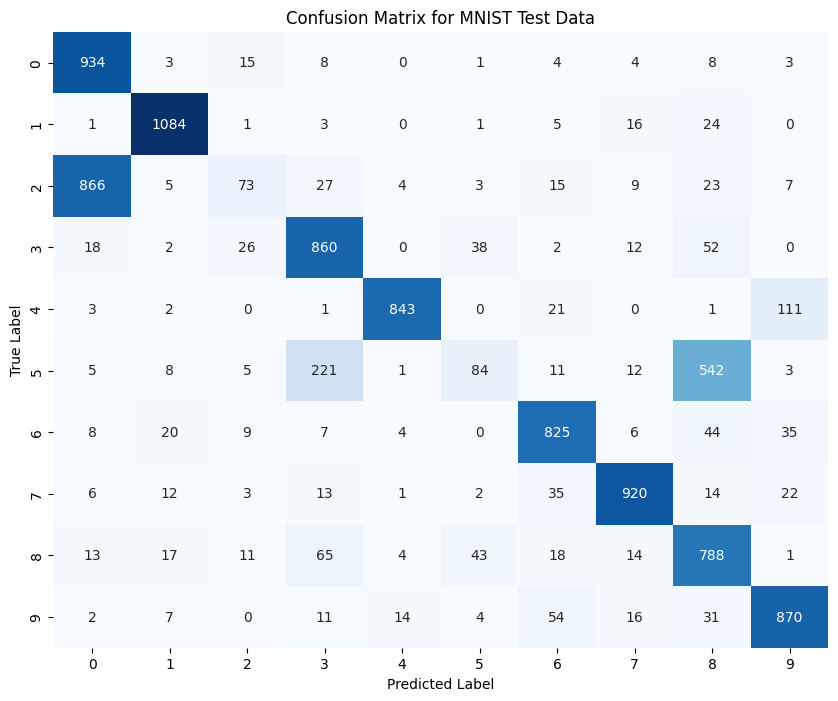

Test Loss: 0.8643600344657898
Test Accuracy: 0.7281000018119812


In [ ]:
# Define the low-rank approximation function
def low_rank_approximation(W, rank):
    U, S, Vt = svd(W, full_matrices=False)
    U_k = U[:, :rank]
    S_k = np.diag(S[:rank])
    Vt_k = Vt[:rank, :]
    return U_k, S_k @ Vt_k

# Function to create and compress the model at different compression levels
def create_compressed_model(weights, compression_factor):
    compressed_model = models.Sequential()
    layers_info = []

    for i in range(0, len(weights), 2):  # Iterate over weight matrices only (skip biases)
        m, n = weights[i].shape  # Get dimensions of the original weight matrix
        k = int(n / compression_factor)  # Calculate rank based on compression factor

        # Apply SVD-based low-rank approximation
        U_k, Vt_k = low_rank_approximation(weights[i], k)

        # Add the first layer of the compressed model
        compressed_model.add(layers.Dense(k, activation='relu', input_shape=(m,), use_bias=False))
        compressed_model.layers[-1].set_weights([U_k])
        layers_info.append(f"Layer {i//2 * 2}: U_k shape {U_k.shape}")

        # Add the second layer of the compressed model
        compressed_model.add(layers.Dense(n, activation='relu', use_bias=True))
        compressed_model.layers[-1].set_weights([Vt_k, weights[i + 1]])  # Use original bias
        layers_info.append(f"Layer {i//2 * 2 + 1}: Vt_k shape {Vt_k.shape}")

    compressed_model.add(layers.Dense(10, activation='softmax'))  # Output layer
    return compressed_model, layers_info

# Assume `weights` is a list of weights from the original model

# Compression levels (2X, 4X, 8X) add however more u want <3
compression_levels = [2, 4, 8]

for factor in compression_levels:
    print(f"\nCreating compressed model with {factor}X compression")
    compressed_model, layers_info = create_compressed_model(weights, factor)
    compressed_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    compressed_model.summary()
    print("\nLayer Information:")
    for info in layers_info:
        print(info)
    print("\n--------------------------------------------")
    compressed_history = compressed_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

    test_loss, test_accuracy = compressed_model.evaluate(x_test, y_test)

    # Generate predictions for the test set
    y_pred = compressed_model.predict(x_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix for MNIST Test Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Print the final test loss and accuracy
    print(f"Test Loss: {test_loss}")
    print(f"Test Accuracy: {test_accuracy}")
